In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('L0001.csv')
df

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.00,100.0,2.0,7750,0.009,0.000,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.00,100.0,2.0,7760,0.009,0.000,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.00,100.0,2.0,7770,0.009,0.000,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.00,100.0,2.0,7780,0.009,0.000,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.00,100.0,2.0,7790,0.009,0.000,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23679,6.10,-15.64,195.0,2.0,385153,0.000,-0.008,463,14400,24.279825,...,8.944272,3.079174,143.387587,0.0,0.100000,0.008,NaN,-1.0,125.000000,24375.000000
23680,6.10,-15.72,195.0,2.0,385163,0.000,-0.008,449,14400,23.909926,...,5.656854,2.903757,96.041658,0.0,0.100520,0.008,NaN,-1.0,125.000000,24375.000000
23681,6.10,-15.80,195.0,2.0,385173,0.000,-0.008,480,14400,24.721549,...,8.485281,1.603043,131.590273,0.0,0.102009,0.008,NaN,-1.0,125.000000,24375.000000
23682,6.10,-15.88,195.0,2.0,385183,0.000,-0.008,499,14400,25.206081,...,6.633250,2.926235,108.641613,0.0,0.104424,0.008,NaN,-1.0,125.000000,24375.000000


In [4]:
df.dropna(inplace=True, axis=1) #drop any columns with NaN values
df

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.00,100.0,2.0,7750,0.009,0.000,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.00,100.0,2.0,7760,0.009,0.000,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.00,100.0,2.0,7770,0.009,0.000,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.00,100.0,2.0,7780,0.009,0.000,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.00,100.0,2.0,7790,0.009,0.000,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23679,6.10,-15.64,195.0,2.0,385153,0.000,-0.008,463,14400,24.279825,...,8.944272,3.079174,143.387587,0.0,0.100000,0.008,NaN,-1.0,125.000000,24375.000000
23680,6.10,-15.72,195.0,2.0,385163,0.000,-0.008,449,14400,23.909926,...,5.656854,2.903757,96.041658,0.0,0.100520,0.008,NaN,-1.0,125.000000,24375.000000
23681,6.10,-15.80,195.0,2.0,385173,0.000,-0.008,480,14400,24.721549,...,8.485281,1.603043,131.590273,0.0,0.102009,0.008,NaN,-1.0,125.000000,24375.000000
23682,6.10,-15.88,195.0,2.0,385183,0.000,-0.008,499,14400,25.206081,...,6.633250,2.926235,108.641613,0.0,0.104424,0.008,NaN,-1.0,125.000000,24375.000000


In [5]:
scaler = StandardScaler() #fits data

In [6]:
df[['MPArea_T', 'velocity_T']] = scaler.fit_transform(df[['MPArea', 'velocity']]) #transforms original curves, makes it easier when plotting

In [7]:
kmeans = KMeans(n_clusters=3) #3 clusters
kmeans.fit(df[['MPArea', 'velocity']]) #fit data

df['kmeans_3'] = kmeans.labels_

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
df

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity,MPArea_T,velocity_T,kmeans_3
0,-6.00,16.00,100.0,2.0,7750,0.009,0.000,0,0,0.000000,...,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111,-4.039656,4.236946,0
1,-5.91,16.00,100.0,2.0,7760,0.009,0.000,127,14400,12.716187,...,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111,-2.635496,4.236946,0
2,-5.82,16.00,100.0,2.0,7770,0.009,0.000,174,14400,14.884343,...,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111,-2.115846,4.236946,0
3,-5.73,16.00,100.0,2.0,7780,0.009,0.000,195,14400,15.756958,...,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111,-1.883663,4.236946,0
4,-5.64,16.00,100.0,2.0,7790,0.009,0.000,201,14400,15.997536,...,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111,-1.817324,4.236946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23679,6.10,-15.64,195.0,2.0,385153,0.000,-0.008,463,14400,24.279825,...,0.0,0.100000,0.008,NaN,-1.0,125.000000,24375.000000,1.079447,-0.236645,1
23680,6.10,-15.72,195.0,2.0,385163,0.000,-0.008,449,14400,23.909926,...,0.0,0.100520,0.008,NaN,-1.0,125.000000,24375.000000,0.924658,-0.236645,1
23681,6.10,-15.80,195.0,2.0,385173,0.000,-0.008,480,14400,24.721549,...,0.0,0.102009,0.008,NaN,-1.0,125.000000,24375.000000,1.267405,-0.236645,1
23682,6.10,-15.88,195.0,2.0,385183,0.000,-0.008,499,14400,25.206081,...,0.0,0.104424,0.008,NaN,-1.0,125.000000,24375.000000,1.477476,-0.236645,1


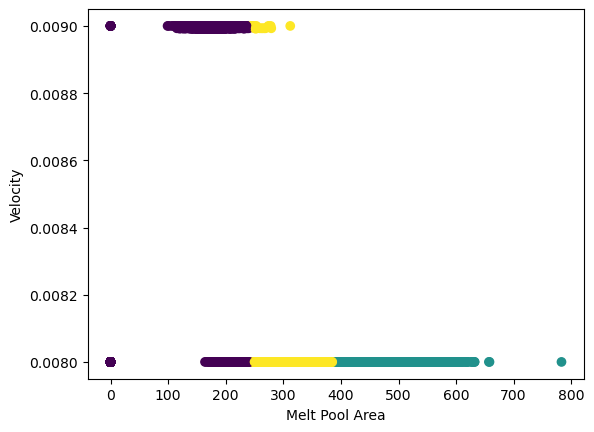

In [9]:
plt.scatter(x=df['MPArea'], y=df['velocity'], c=df['kmeans_3'])
plt.xlabel('Melt Pool Area')
plt.ylabel('Velocity')
plt.show() #bad outcome because the laser only seems to operate on 2 power levels not allowing for much variability
#data shows that MPArea isnt really affected by velocity because the range of the MPArea exists across very low and very high velocities

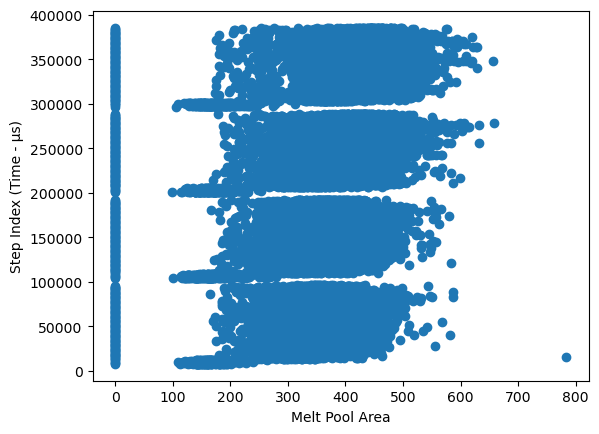

In [10]:
plt.scatter(x=df['MPArea'], y=df['stepIndex'])
plt.xlabel('Melt Pool Area')
plt.ylabel('Step Index (Time - µs)') #I think step index is time
#This is based off the article saying that the camera shutters at 10µs and step index increases by 10 each row
plt.show()